## Stats and Public Health - Part 2

#### Author   : Mehrnoosh Behzadi
#### Contact : mehrnoosh.behzadi@gmail.com
#### Date       : June 11th, 2023

### Intruduction

We are exploring the West Nile Virus (WNV) dataset again, containing mosquito tracking data from the city of Chicago, Illinois, spanning from 2007 to 2019. 
Since the data is preprocessed and cleaned, we just move on to a set of analyses on the relationship between the different variables and the mosquito number, as well as the probability of finding WNV Virus at any particular time and location. 

#### Table of Content
- [Part 1 - Basic Analysis](#part-1)
- [Part 2 - Statistical Analysis](#part-2)
- [Part 3 - Advanced Statistical Analysis](#part-3)

In [11]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [12]:
# Read the mosquito data from the CSV file using pandas
df = pd.read_csv('mosquito_data_part_2.csv')

In [13]:
# Display summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Trap type        18495 non-null  object 
 5   Date             18495 non-null  object 
 6   Mosquito number  18495 non-null  int64  
 7   WNV Present      18495 non-null  object 
 8   Species          18495 non-null  object 
 9   Lat              18495 non-null  float64
 10  Lon              18495 non-null  float64
 11  Month            18495 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.7+ MB


The dataset has the following characteristics:

- The dataset consists of 18,495 entries and 12 columns.
- The columns include features such as 'Year', 'Week', 'Address Block', 'Trap', 'Trap type', 'Date', 'Mosquito number', 'WNV Present', 'Species', 'Lat', 'Lon', and 'Month'.
- The 'Year', 'Week', 'Mosquito number', and 'Month' columns are of integer data type.
- The 'Address Block', 'Trap', 'Trap type', 'Date', 'WNV Present', 'Species' columns are of object data type.
- The 'Lat' and 'Lon' columns represent latitude and longitude values and are of float data type.
- The dataset does not contain any missing values as the 'Non-Null Count' for all columns is equal to the total number of entries (18,495).

In [14]:
# Display the first few rows of the DataFrame
df.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9


### Part 1 - Basic Analysis <a class="anchor" id="part-1"></a>

#### Question 1-1: Convert the WNV Present column into a binary column and create dummy variables from the Trap type column.

In [15]:
# Q1-1 : Convert "WNV Present" column to binary
df['WNV Present'] = df['WNV Present'].replace({'negative': 0, 'positive': 1})

# Create dummy variables for "Trap type" column
df = pd.get_dummies(df, columns=['Trap type'])

In [16]:
df.sample(10)

,Year,Week,Address Block,Trap,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month,Trap type_CDC,Trap type_GRAVID,Trap type_OVI,Trap type_SENTINEL
4451,2015,32,70XX N MOSELLE AVE,T008,2015-08-13 00:08:00,3,0,CULEX PIPIENS,42.007998,-87.778235,8,0,1,0,0
5564,2014,36,89XX S MUSKEGON AVE,T099,2014-09-05 00:09:00,1,1,CULEX PIPIENS,41.733188,-87.555629,9,0,1,0,0
17670,2014,37,5XX S CENTRAL AVE,T031,2014-09-11 00:09:00,21,1,CULEX PIPIENS,41.872881,-87.764730,9,0,1,0,0
12959,2008,34,28XX N FRANCISCO AVE,T147,2008-08-25 00:08:00,3,0,CULEX RESTUANS,41.932790,-87.700238,8,0,1,0,0
11739,2009,37,1XX N CENTRAL PARK DR,T030,2009-09-17 00:09:00,1,0,CULEX RESTUANS,41.883772,-87.716168,9,0,1,0,0
12928,2008,34,15XX W WEBSTER AVE,T045,2008-08-26 00:08:00,2,0,CULEX PIPIENS,41.921705,-87.666963,8,0,1,0,0
15139,2007,26,91XX W HIGGINS RD,T009,2007-07-27 11:07:18,1,0,CULEX PIPIENS,41.988586,-87.854473,7,1,0,0,0
14958,2007,28,64XX S STONY ISLAND AVE,T077,2007-08-01 02:08:34,2,0,CULEX PIPIENS,41.778129,-87.586245,8,1,0,0,0
15270,2007,27,42XX N RICHMOND ST,T146,2007-07-11 03:07:41,1,0,CULEX PIPIENS,41.958006,-87.702181,7,0,1,0,0
2849,2017,28,89XX S CARPENTER ST,T159,2017-07-14 00:07:00,15,0,CULEX RESTUANS,41.731447,-87.649722,7,0,1,0,0


#### Question 1-2: Calculate the average number of mosquitoes for each month

The average number of mosquitoes caught per month suggest a seasonal pattern in mosquito activity, with the highest numbers observed in the summer months (June, July, and August) and a decline in the fall months (September and October). This information can be valuable for understanding mosquito population dynamics and planning mosquito control strategies.

In [40]:
# Q1-2 : Calculate the average number of mosquitoes for each month
average_mosquitoes_per_month = df.groupby('Month')['Mosquito number'].mean()

print(average_mosquitoes_per_month)

Month
5      2.761905
6     10.264442
7     11.551879
8     12.111321
9      8.394973
10     5.377778
Name: Mosquito number, dtype: float64


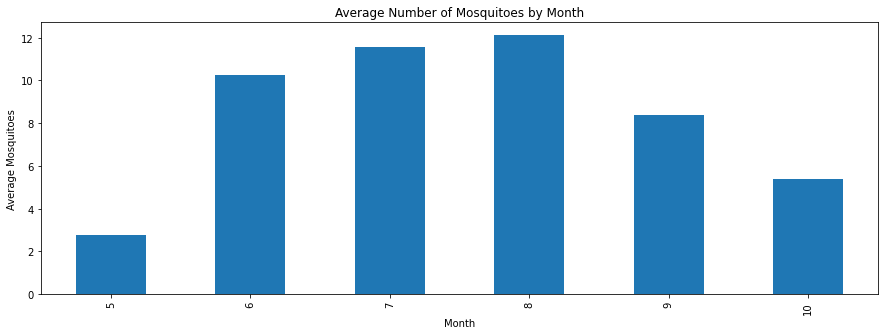

In [41]:
plt.figure(figsize=(15, 5))
average_mosquitoes_per_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Mosquitoes')
plt.title('Average Number of Mosquitoes by Month')
plt.show()

### Part 2 - Statistical Analysis <a class="anchor" id="part-2"></a>

#### Q2-1: Chi-square Test of Independence: Mosquito Species and WNV Presence

In this section the chi-square test of independence was conducted to analyze the relationship between mosquito species and the presence of West Nile Virus (WNV).

In [20]:
# Q2-1 : Chi-square Test of Independence: Mosquito Species and WNV Presence
from scipy.stats import chi2_contingency
# Contingency table of mosquito species and WNV presence
contingency_table = pd.crosstab(df['Species'], df['WNV Present'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)

Chi-square statistic: 311.10394683130164
P-value: 3.9302341764409087e-67


Based on these results, we can conclude that there is a highly significant relationship between mosquito species and the presence of WNV. The association suggests that different mosquito species may have varying levels of susceptibility to WNV or play different roles in its transmission.

#### Question 2-2: Calculate correlations and p-values with Mosquito number

The correlation coefficients include the correlation with the "WNV Present" variable, which measures the strength and direction of the linear relationship between "Mosquito number" and the presence of West Nile Virus (WNV).

In [42]:
# Q2-2 : Calculate correlations and p-values with "Mosquito number"
from scipy.stats import pearsonr

correlations = {}
p_values = {}
columns = df.select_dtypes(include='number').columns

for column in columns:
    if column != 'Mosquito number':
        correlation, p_value = pearsonr(df['Mosquito number'], df[column])
        correlations[column] = correlation
        p_values[column] = p_value

# Sort the correlations by magnitude
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the sorted correlations and p-values
for column, correlation in sorted_correlations:
    p_value = p_values[column]
    significance = "Significant" if p_value < 0.05 else "Not significant"
    if correlation > 0:
        print(f"{column}: Positive correlation ({correlation}), {significance}")
    else:
        print(f"{column}: Negative correlation ({correlation}), {significance}")

WNV Present: Positive correlation (0.40803439689029875), Significant
Lon: Negative correlation (-0.151421125968909), Significant
Trap type_GRAVID: Negative correlation (-0.13827479127699158), Significant
Year: Positive correlation (0.12932594549371043), Significant
Trap type_SENTINEL: Positive correlation (0.10857486046661546), Significant
Lat: Positive correlation (0.09681989674648903), Significant
Trap type_CDC: Positive correlation (0.09414701564247441), Significant
Month: Negative correlation (-0.040426437196600794), Significant
Week: Negative correlation (-0.0338996075449608), Significant
Trap type_OVI: Negative correlation (-0.005391611231865273), Not significant


The positive correlations with "Year", "Trap type_SENTINEL", "Lat", and "Trap type_CDC" indicate that these variables are positively associated with higher mosquito numbers caught. The negative correlations with "Month" and "Week" suggest that mosquito numbers tend to decrease as the month and week progress.

It's important to consider the significance of these correlations. All correlations mentioned above are statistically significant, indicating that the observed relationships are unlikely to have occurred by chance alone.

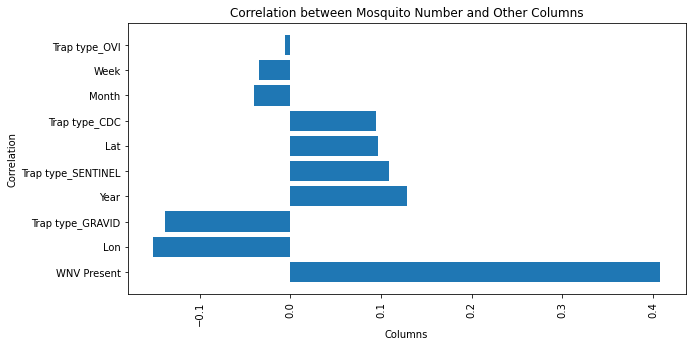

In [25]:
correlation_values = [correlation for _, correlation in sorted_correlations]
columns = [column for column, _ in sorted_correlations]

plt.figure(figsize=(10, 5))
plt.barh(columns, correlation_values)
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.title('Correlation between Mosquito Number and Other Columns')
plt.xticks(rotation=90)
plt.show()

### Part 3 - Advanced Statistical Analysis <a class="anchor" id="part-3"></a>

#### Question 3-1: Explore the impact of independent variables on number of mosquitos caught using linear regression

In this section the linear regression was conducted to determine how the independent variables affect the number of mosquitoes caugh.

In [26]:
# Q3-1 : Explore the impact of independent variables on number of mosquitos caught using linear regression

# Identify independent and dependent variables
X = df[['Year', 'Week', 'Lat', 'Lon', 'Month']]
y = df['Mosquito number']

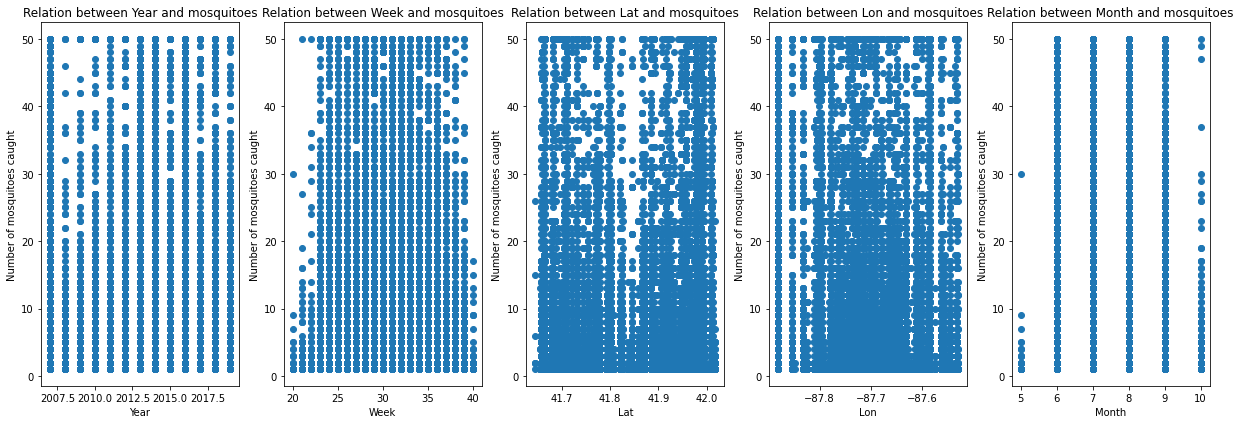

In [27]:
# Is the relation linear?
plt.subplots(1, 5, figsize=(17, 6))

for index, col in enumerate(X.columns):
    plt.subplot(1, 5, index + 1)
    plt.scatter(X[col], y)
    plt.title(f"Relation between {col} and mosquitoes")
    plt.ylabel("Number of mosquitoes caught")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [28]:
# Add constant to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Mosquito number   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     146.5
Date:                Mon, 12 Jun 2023   Prob (F-statistic):          4.92e-153
Time:                        02:39:00   Log-Likelihood:                -73986.
No. Observations:               18495   AIC:                         1.480e+05
Df Residuals:                   18489   BIC:                         1.480e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2777.3672    112.169    -24.761      0.0

Overall, the model suggests that the 'Mosquito number' is influenced by the 'Year', 'Week', 'Lat', 'Lon', and 'Month'. However, the low R-squared value indicates that these variables explain only a small portion of the variation in the 'Mosquito number'. Further analysis may be needed to improve the model's predictive power and consider additional factors.

#### Question 3-2: Explore the impact of independent variables on West Nile Virus presence using logistic regression

In [35]:
#Q3-2 : Explore the impact of independent variables on West Nile Virus presence using logistic regression

# Select independent variables and target variable
X = df[['Year', 'Week', 'Lat', 'Lon', 'Mosquito number']]
y = df['WNV Present']

In [37]:
# Add a constant column to the independent variables
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the summary of the logistic regression model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.411046
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18489
Method:                           MLE   Df Model:                            5
Date:                Mon, 12 Jun 2023   Pseudo R-squ.:                  0.2122
Time:                        02:49:11   Log-Likelihood:                -7602.3
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -497.1134     23.794    -20.892      0.000    -543.749    -450.478
Year          

The model has converged successfully, indicating that the optimization process reached a stable solution. However, it's important to note that this model assumes no multicollinearity or other numerical problems. Additional diagnostics and evaluation of the model's performance may be necessary.

Overall, the logistic regression model suggests that the 'Year', 'Week', 'Lat', 'Lon', and 'Mosquito number' have a significant impact on the presence of West Nile Virus. These variables can be used to predict the likelihood of WNV presence based on their respective coefficients.

In [38]:
# Fitting the model 

# 1. Instantiate model
mylogreg_model= sm.Logit(y,X)

# 2. Fit model
mylogreg_results = mylogreg_model.fit()

# Look at summary
mylogreg_results.summary()

Optimization terminated successfully.
         Current function value: 0.411046
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18489
Method:                           MLE   Df Model:                            5
Date:                Mon, 12 Jun 2023   Pseudo R-squ.:                  0.2122
Time:                        02:49:16   Log-Likelihood:                -7602.3
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -497.1134     23.794    -20.892      0.000    -543.749    -450.478
Year                0.0955      0.006     16.444      0.000       0.084       0.107
Week                0.1544      0.005     29.044      0.000       0.144       0.165
Lat                -0.7445      0.284     -2.619      0.009      -1.302      -0.187
Lon                -3.7496      0.331    -11.329      0.000      -4.398      -3.101
Mosquito number     0.0672      0.001     47.620      0.000       0.064       0.070
===================================================================================
"""

In this model, the significant variables with their coefficients are:

Year: 0.0955
Week: 0.1544
Lat: -0.7445
Lon: -3.7496
Mosquito number: 0.0672

These results suggest that the year, week, latitude, longitude, and mosquito number have a significant impact on the likelihood of West Nile Virus presence.